In [23]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib


In [24]:
# Subgroup 4 Data
df = pd.read_csv('/content/cluster_4.csv')
df.head()


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Cluster,Bankrupt?,Index
0,0.483401,0.556694,0.536164,0.602445,0.602445,0.999035,0.797458,0.809380,0.303506,0.781633,...,0.602444,0.841891,0.293391,0.027063,0.566190,1,0.015406,4,0,3
1,0.465071,0.533689,0.516944,0.594740,0.594740,0.998962,0.797393,0.809313,0.303544,0.781572,...,0.594736,0.840085,0.285529,0.029521,0.568791,1,0.019155,4,0,6
2,0.514649,0.579972,0.565983,0.614112,0.613990,0.999064,0.797502,0.809414,0.303521,0.781680,...,0.614110,0.842268,0.281334,0.026958,0.565847,1,0.024784,4,0,44
3,0.518842,0.592183,0.574121,0.616901,0.616901,0.999235,0.797703,0.809599,0.303515,0.781881,...,0.616897,0.844463,0.290621,0.026799,0.565197,1,0.016305,4,0,53
4,0.476966,0.545083,0.527651,0.610019,0.610019,0.999096,0.797529,0.809422,0.303502,0.781690,...,0.610016,0.841044,0.282803,0.026798,0.565189,1,0.022151,4,0,56


In [25]:
# Separate features and target
X = df.drop(columns=["Index", "Cluster", "Bankrupt?"])
y = df["Bankrupt?"]


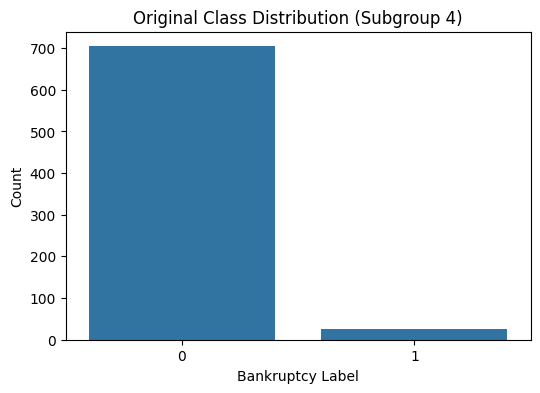

In [26]:
# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Original Class Distribution (Subgroup 4)")
plt.xlabel("Bankruptcy Label")
plt.ylabel("Count")
plt.show()

In [27]:
# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


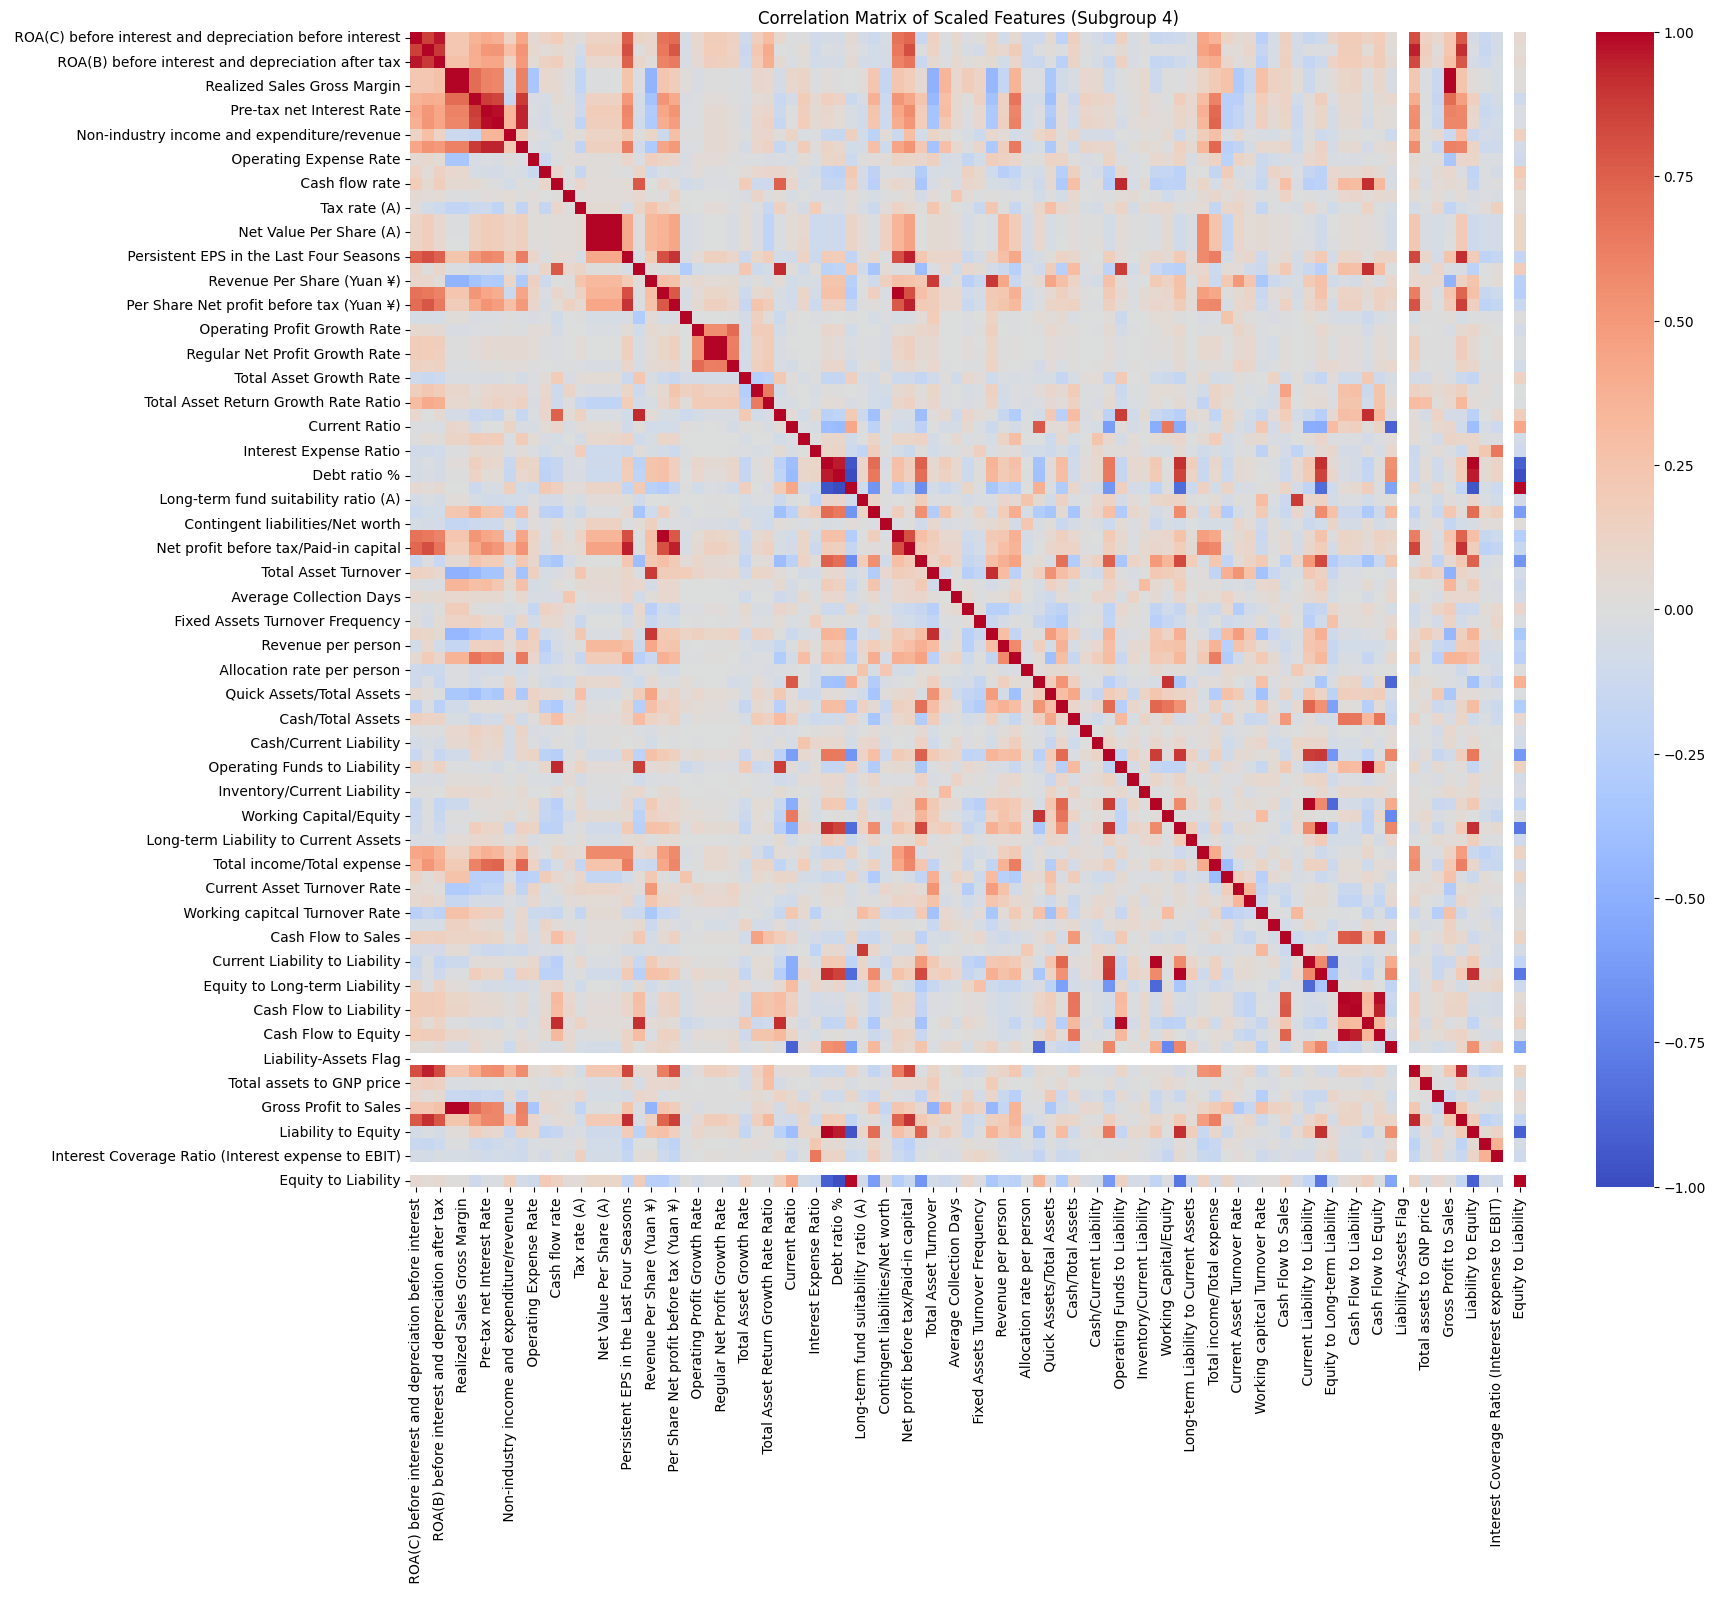

In [28]:
# correlation matrix
corr_matrix = X_scaled_df.corr()

plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Matrix of Scaled Features (Subgroup 4)")
plt.show()

In [29]:
# Feature Selection - 15
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_scaled_df, y)
importances = pd.Series(rf_selector.feature_importances_, index=X.columns)

top_features = importances.sort_values(ascending=False).head(15).index.tolist()
X_selected = X_scaled_df[top_features]



In [30]:
X_selected.head()

,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Cash/Total Assets,Interest Expense Ratio,Non-industry income and expenditure/revenue,ROA(C) before interest and depreciation before interest,Net Value Growth Rate,Inventory/Working Capital,Total income/Total expense,Net Income to Stockholder's Equity,ROA(B) before interest and depreciation after tax,Working Capital/Equity,Pre-tax net Interest Rate,Borrowing dependency,Net Income to Total Assets
0,-0.165146,0.021662,-0.398896,0.132532,-0.042144,-0.713085,-0.121527,0.491937,0.199842,0.311715,-0.592950,1.310693,0.044977,3.244540,-0.240025
1,0.672556,1.428174,-0.520515,6.835668,0.430021,-1.593788,-0.285924,0.266426,-0.706689,-1.259309,-1.548693,-0.168917,-0.658630,0.315562,-1.313594
2,-0.200826,-0.163686,-0.048456,-0.208036,0.144316,0.788327,-0.059079,-0.077774,-0.199363,0.639607,0.889917,-0.198499,0.512066,-0.290126,1.204176
3,-0.255067,-0.515267,-0.192019,-0.268611,0.072133,0.989764,0.195280,0.227138,2.940803,2.548570,1.294577,0.991142,2.677929,2.020054,1.632510
4,-0.255640,-0.519548,-0.458752,0.520080,-0.093273,-1.022268,-0.258300,0.286414,0.250510,-0.425076,-1.016245,0.580079,0.805111,-0.333476,-0.315427


In [31]:
# Base Models

base_models = {
    "rf": RandomForestClassifier(n_estimators=500, max_depth=None, random_state=42),
    "gb": GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=42),
    "dt": DecisionTreeClassifier(max_depth=None, random_state=42)
}

# Meta Model
meta_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=42)


In [32]:
X_selected.head()

,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Cash/Total Assets,Interest Expense Ratio,Non-industry income and expenditure/revenue,ROA(C) before interest and depreciation before interest,Net Value Growth Rate,Inventory/Working Capital,Total income/Total expense,Net Income to Stockholder's Equity,ROA(B) before interest and depreciation after tax,Working Capital/Equity,Pre-tax net Interest Rate,Borrowing dependency,Net Income to Total Assets
0,-0.165146,0.021662,-0.398896,0.132532,-0.042144,-0.713085,-0.121527,0.491937,0.199842,0.311715,-0.592950,1.310693,0.044977,3.244540,-0.240025
1,0.672556,1.428174,-0.520515,6.835668,0.430021,-1.593788,-0.285924,0.266426,-0.706689,-1.259309,-1.548693,-0.168917,-0.658630,0.315562,-1.313594
2,-0.200826,-0.163686,-0.048456,-0.208036,0.144316,0.788327,-0.059079,-0.077774,-0.199363,0.639607,0.889917,-0.198499,0.512066,-0.290126,1.204176
3,-0.255067,-0.515267,-0.192019,-0.268611,0.072133,0.989764,0.195280,0.227138,2.940803,2.548570,1.294577,0.991142,2.677929,2.020054,1.632510
4,-0.255640,-0.519548,-0.458752,0.520080,-0.093273,-1.022268,-0.258300,0.286414,0.250510,-0.425076,-1.016245,0.580079,0.805111,-0.333476,-0.315427


In [33]:
# Train Base Models
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
meta_features = []

print("\n--- Base Models Cross-Validation Accuracies ---\n")

for name, model in base_models.items():
    fold_preds = np.zeros(X_selected.shape[0])
    for train_idx, val_idx in skf.split(X_selected, y):
        model.fit(X_selected.iloc[train_idx], y.iloc[train_idx])
        preds = model.predict_proba(X_selected.iloc[val_idx])[:, 1]
        fold_preds[val_idx] = preds
    acc = accuracy_score(y, (fold_preds >= 0.5).astype(int))
    print(f"{name.upper()} CV Accuracy: {acc:.4f}")
    meta_features.append(fold_preds.reshape(-1, 1))

# Stack base model outputs
X_meta = np.hstack(meta_features)


--- Base Models Cross-Validation Accuracies ---

RF CV Accuracy: 0.9685
GB CV Accuracy: 0.9630
DT CV Accuracy: 0.9452


In [34]:
# Train Meta Model (GradientBoostingClassifier)
meta_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
meta_model.fit(X_meta, y)

# Save Meta Model
joblib.dump(meta_model, "subgroup_4_model.pkl")
print("\n Meta Model saved as 'subgroup_4_model.pkl'")



 Meta Model saved as 'subgroup_4_model.pkl'


In [35]:
# Evaluate

print("\n--- Final Evaluation ---\n")

# Base Models
for name, model in base_models.items():
    y_pred_base = model.predict(X_selected)
    cm_base = confusion_matrix(y, y_pred_base)
    TT_base = cm_base[1, 1]
    TF_base = cm_base[1, 0]
    acc_base = TT_base / (TT_base + TF_base) if (TT_base + TF_base) > 0 else 0
    print(f"{name.upper()} - TT: {TT_base}, TF: {TF_base}, Accuracy (acc) for bankrupt companies: {acc_base:.4f}")

# Meta Model
meta_features_original = []

for name, model in base_models.items():
    preds = model.predict_proba(X_selected)[:, 1]
    meta_features_original.append(preds.reshape(-1, 1))

X_meta_original = np.hstack(meta_features_original)
y_pred_meta = meta_model.predict(X_meta_original)

print("\n--- Meta Model Evaluation ---\n")
print("Classification Report:\n")
print(classification_report(y, y_pred_meta))

cm_meta = confusion_matrix(y, y_pred_meta)
TT_meta = cm_meta[1, 1]
TF_meta = cm_meta[1, 0]
meta_acc = TT_meta / (TT_meta + TF_meta) if (TT_meta + TF_meta) > 0 else 0

print(f"\nMeta Model - TT: {TT_meta}, TF: {TF_meta}, Accuracy (acc) for bankrupt companies: {meta_acc:.4f}")


--- Final Evaluation ---

RF - TT: 21, TF: 5, Accuracy (acc) for bankrupt companies: 0.8077
GB - TT: 19, TF: 7, Accuracy (acc) for bankrupt companies: 0.7308
DT - TT: 24, TF: 2, Accuracy (acc) for bankrupt companies: 0.9231

--- Meta Model Evaluation ---

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       704
           1       0.96      1.00      0.98        26

    accuracy                           1.00       730
   macro avg       0.98      1.00      0.99       730
weighted avg       1.00      1.00      1.00       730


Meta Model - TT: 26, TF: 0, Accuracy (acc) for bankrupt companies: 1.0000


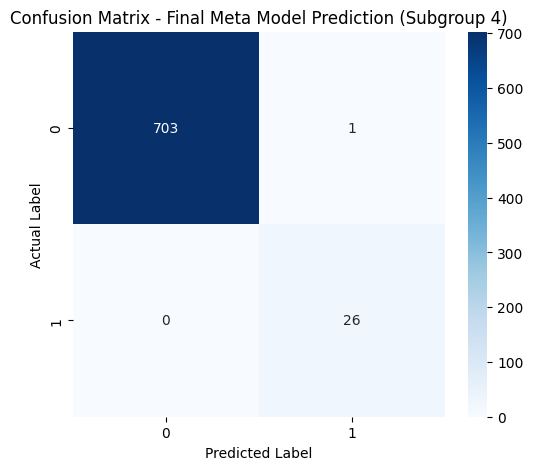

In [36]:
# Final Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_meta, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Final Meta Model Prediction (Subgroup 4)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
